In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#한글설정
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('all_data.csv')
df.head()

,gid,lon,lat,인구_여자_sqrt,유소년_전체_sqrt,고령_전체_sqrt,건축물수_sqrt,security_encoded,20년이상건물
0,ㅼㅤㄱㅝㅀ702379,127.163692,37.440244,17.029386,5.916080,10.246951,8.717798,1,1
1,ㅼㅤㄱㅝㅀ698388,127.159133,37.448344,15.000000,4.898979,9.273618,6.557439,1,1
2,ㅼㅤㄱㅝㅀ668384,127.125235,37.444636,9.539392,2.645751,8.000000,4.123106,1,1
3,ㅼㅤㄱㅝㅀ673383,127.130892,37.443752,12.922848,5.656854,8.717798,5.291503,1,1
4,ㅼㅤㄱㅝㅀ608326,127.057714,37.392123,7.071068,2.449490,5.196152,3.000000,1,0


In [21]:
df.drop(['gid','lon','lat'],axis=1,inplace=True)

여성 인구 : female population  
유소년 인구 : youth population  
노령 인구 : elderly population  
건축물 수 : number of buildings  
cctv + 보안등 : cctv_light  
20년이상 건물 : building over 20 years

In [22]:
df.columns=['fp','yp','ep','nb','cctv_light','b20']

In [23]:
df.head()

,fp,yp,ep,nb,cctv_light,b20
0,17.029386,5.916080,10.246951,8.717798,1,1
1,15.000000,4.898979,9.273618,6.557439,1,1
2,9.539392,2.645751,8.000000,4.123106,1,1
3,12.922848,5.656854,8.717798,5.291503,1,1
4,7.071068,2.449490,5.196152,3.000000,1,0


In [24]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [ ]:
km = KMeans(
    n_clusters=,
    init="k-means++",
    max_iter=100,
    n_init=1

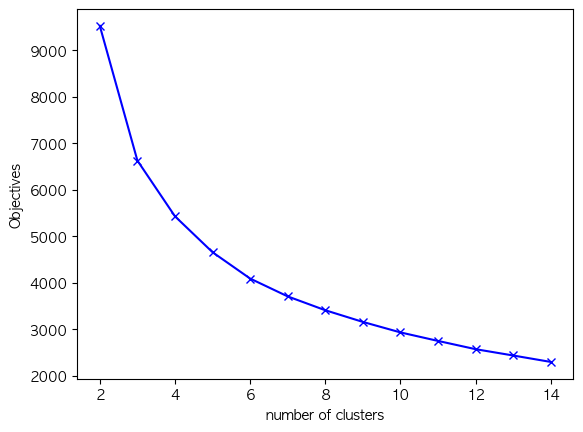

In [28]:
Objectives = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Objectives.append(km.inertia_)

plt.plot(K, Objectives, 'bx-')
plt.xlabel('k')
plt.ylabel('Objectives')
plt.xlabel('number of clusters')
plt.show() 

In [31]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score 
silhouette_score(df, km.labels_, metric='euclidean')

0.26707774550421054

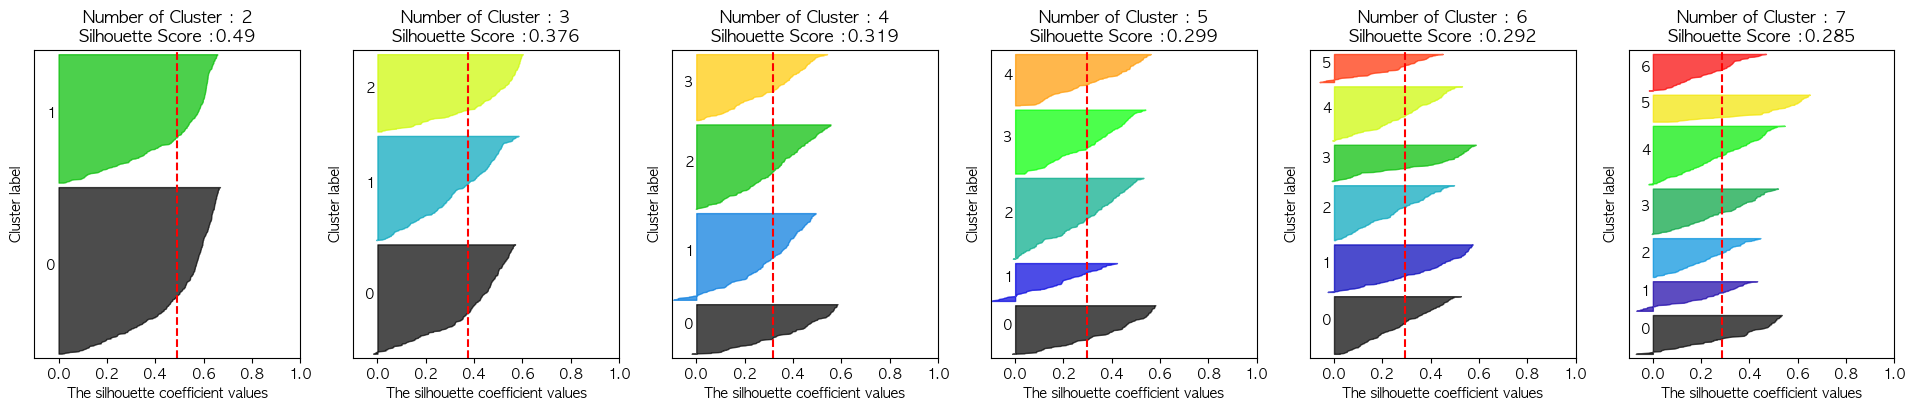

In [34]:
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
def visualize_silhouette(cluster_lists, X_features):     
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

visualize_silhouette([2, 3, 4, 5, 6, 7], df)

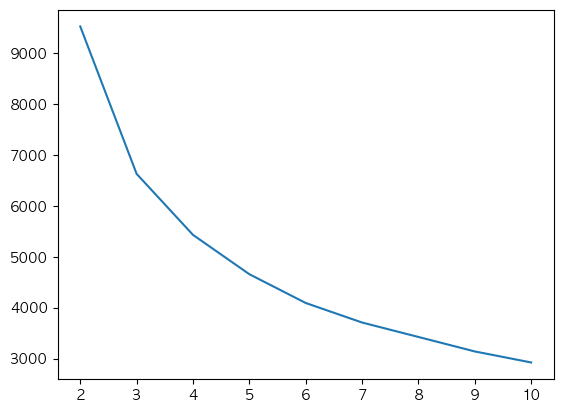

In [35]:
def visualize_inertia(cluster_lists, X_features):
    inertias = []
    for n_cluster in cluster_lists:
        k_means = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        k_means.fit(X_features)
        inertias.append(k_means.inertia_)
        
    sns.lineplot(x=cluster_lists, y=inertias)
visualize_inertia([i for i in range(2, 11)], df)

In [39]:
km = KMeans(n_clusters=3)
km = km.fit(df)
df3 = df.copy()
df3['label']=km.labels_

In [43]:
df3.label.value_counts()

1    271
0    258
2    192
Name: label, dtype: int64

In [44]:
km = KMeans(n_clusters=4)
km = km.fit(df)
df4 = df.copy()
df4['label']=km.labels_
df4.label.value_counts()

0    215
1    212
3    169
2    125
Name: label, dtype: int64

In [45]:
km = KMeans(n_clusters=6)
km = km.fit(df)
df6 = df.copy()
df6['label']=km.labels_
df6.label.value_counts()

2    150
0    143
1    141
4    123
3     85
5     79
Name: label, dtype: int64

In [47]:
df3.to_csv('df3.csv')
df4.to_csv('df4.csv')
df6.to_csv('df6.csv')

In [49]:
df.duplicated().sum()

0

In [50]:
df3

,fp,yp,ep,nb,cctv_light,b20,label
0,17.029386,5.916080,10.246951,8.717798,1,1,1
1,15.000000,4.898979,9.273618,6.557439,1,1,1
2,9.539392,2.645751,8.000000,4.123106,1,1,0
3,12.922848,5.656854,8.717798,5.291503,1,1,0
4,7.071068,2.449490,5.196152,3.000000,1,0,2
...,...,...,...,...,...,...,...
716,17.663522,10.440307,8.717798,2.645751,0,0,1
717,15.588457,5.196152,10.583005,6.480741,1,1,1
718,17.635192,5.744563,10.392305,6.633250,1,1,1
719,15.716234,5.385165,9.539392,4.898979,1,1,1
